Scipy es literalmente una transposición de cosas matemáticas. Si hay alguna duda buscar únicamente las explicaciones matemáticas de cada cosa y au.

https://www.w3schools.com/python/scipy/scipy_getting_started.php

## CONSTANTS

In [1]:
from scipy import constants

Constants in SciPy:

In [2]:
print(dir(constants))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_con

## Unit Categories
The units are placed under these categories:

- Metric
- Binary
- Mass
- Angle
- Time
- Length
- Pressure
- Volume
- Speed
- Temperature
- Energy
- Power
- Force

https://www.w3schools.com/python/scipy/scipy_constants.php

## OPTIMIZACIÓN (MATHEMATICAL ANALYSIS)

Mathematical analysis is done to find (i.e. solve for) the following:

- Roots: Find x at f(x) = 0 or f(x) - c(x) = 0.

- Optimals: Find both x and f(x) at minima and maxima.

- Derivatives: Find the slope of f(x) at a location x.

- Integrals: Find the area under f(x) between x = a and x = b.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import misc
from scipy import integrate

## optimze.root function.

**Args**:
- fun - a function representing an equation.
- x0 - an initial guess for the root.

The actual solution is given under attribute x of the returned object.

**Explicación**:
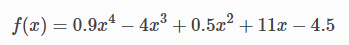

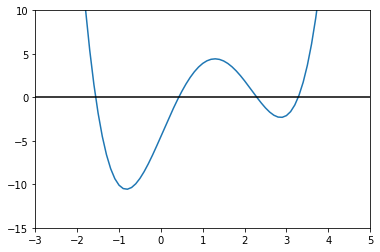

In [7]:
def f(x):
    return  0.9 * x**4 - 4 * x**3 + 0.5 * x**2 + 11 * x - 4.5


x = np.arange(-10, 10, 0.1)
y = []
for i in x:
    result = f(i)
    y.append(result)

plt.figure(1)
plt.plot(x, y)
plt.xlim(-3, 5)
plt.ylim(-15, 10)
plt.axhline(y=0, color='k') #dibuja la línea en y=0
plt.show()

By inspection of the plot it appears f(x) has four roots. A **root** is the x-intercept, in other words, the location where f(x) = 0 (The word root comes from the idea that a plant grows up from its roots and the x-axis is like the ground). 

To find a root we must provide an initial guess that will be the starting point for the scipy algorithm to search. Let’s find the root near x = -2 first.

In [4]:
result = optimize.root(f, -2)

print(result)

    fjac: array([[-1.]])
     fun: array([-3.55271368e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.20458318e-09])
       r: array([33.28953419])
  status: 1
 success: True
       x: array([-1.55782277])


In [5]:
result.x

array([-1.55782277])

Vemos que la raíz (y=0) más cercana a x=-2 la encontramos en x=-1.5578.

The solution is represented as a OptimizeResult object. Important attributes are: x the solution array, success a Boolean flag indicating if the algorithm exited successfully and message which describes the cause of the termination.

**Buscar x para otros valores de y (no necesariamente y=0=)**

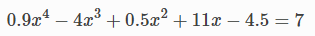

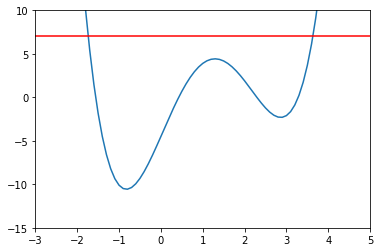

In [9]:
def f(x):
    return  0.9 * x**4 - 4 * x**3 + 0.5 * x**2 + 11 * x - 4.5


x = np.arange(-10, 10, 0.1)
y = []
for i in x:
    result = f(i)
    y.append(result)

plt.figure(1)
plt.plot(x, y)
plt.xlim(-3, 5)
plt.ylim(-15, 10)
plt.axhline(y=7, color='r')
plt.show()



It appears there are solutions near -2 and 3.

The next step is to transform the function by setting it equal to zero. The new function f2 can now be solved for its roots near the initial guess values -2 and 3.

In [10]:
def f2(x):
    return f(x) - 7 #le resta 7 a la función de antes porque, al pasar el siete al otro lado, este pasa restando
                    #Es decir: f(x) - 7 = 0 (f(x) siendo la polinomial que vimos antes)


result = optimize.root(f2, [-2, 3])
print(result.x)

[-1.73573581  3.63147902]


## scipy.optimize.minimize()

https://www.youtube.com/watch?v=Y7e7DCsDUMY (En qué consiste buscar la mínima y la máxima de una función)

A function, in this context, represents a curve, curves have high points and low points.

High points are called maxima. Global vs local maxima.

Low points are called minima. Global vs local minima.

---

The minimize() function takes the following arguments:

- fun - a function representing an equation.
- x0 - an initial guess for the root.
- method - name of the method to use. Legal values:
    'CG'//
    'BFGS'//
    'Newton-CG'//
    'L-BFGS-B'//
    'TNC'//
    'COBYLA'//
    'SLSQP'//

- callback - function called after each iteration of optimization.

- options - a dictionary defining extra params:

        {
             "disp": boolean - print detailed description
             "gtol": number - the tolerance of the error
          }
          

**Explicación:**

By inspection of the plot it appears there is a minimum near x = -1 (In fact, the plot shows it is the global minimum).

In [11]:
result = optimize.minimize(f, -1)

print(result)

      fun: -10.57170310882053
 hess_inv: array([[0.03556876]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.82450405])


The important attributes of the object are fun (the value of the minimum that was found) and x (the location of the minimum).

There is another minimum (a local minimum) near x = 3.

In [12]:
result = optimize.minimize(f, 3)

print("Minimum = ", result.fun)
print("at location x = ", result.x[0])

Minimum =  -2.309700223712568
at location x =  2.863757146221963


By inspection of the plot the global maximum is infinity at x = -infinity and x = infinity. 

There also appears to be a local maximum near x = 1. 

**Buscar la maxima:** Note the scipy function explicitly finds the minimum. Consequently, to find a maximum we need to write a new function that negates the original function (effectively turning it upside down). For example we define a new function f2. Next we run the scipy search algorithm on the new function f2 and remember to negate the fun attribute of the result object.

In [13]:
def f2(x):
    return  -f(x)


result = optimize.minimize(f2, 1)

print("Maximum = ", -result.fun)
print("at x location ", result.x[0])


Maximum =  4.42769962882684
at x location  1.2940795902164146


- **Nota**: The examples above find local minima/maxima near an initial guess for smooth, continuous, convex/concave functions. scipy has other optimization methods for other situations. For example, scipy.optimize.differential_evolution will find global minima/maxima and can be used on non-smooth functions.

#### EN CASO DE NECESIDAD, LEER PÁGINA WEB UTILIZADA PARA SABER CÓMO FUNCIONAN LAS DERIVADAS Y LAS INTEGRALES

## SPARSE DATA

- Data that has mostly unused elements (elements that don't carry any information). Ex: [1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0] 
- Dense Array: is the opposite of a sparse array: most of the values are not zero.

## scipy.sparse

- CSC - Compressed Sparse Column. For efficient arithmetic, fast column slicing.
- CSR - Compressed Sparse Row. For fast row slicing, faster matrix vector products

We can create CSR matrix by passing an arrray into function scipy.sparse.csr_matrix().

In [6]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])

print(csr_matrix(arr))

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2


From the result we can see that there are 3 items with value.

- The 1. item is in row 0 position 5 and has the value 1.
- The 2. item is in row 0 position 6 and has the value 1.
- The 3. item is in row 0 position 8 and has the value 2.

### Sparse Matrix Methods

- .data: ver solo los elementos que contienen algun tipo de dato
- .count_nonzero(): cuenta la cantidad de valores que no son cero.
- .eliminate_zeros(): eliminate zero-entries.
- .sum_duplicates(): ????? elimina entradas duplicadas.
- .tocsc(): convierte de csr (por filas) a csc (por columnas)


In [16]:
print(csr_matrix(arr).data, '\n')
print(csr_matrix(arr).count_nonzero(), '\n')

[1 1 2] 

3 



In [17]:
import numpy as np
from scipy.sparse import csr_matrix

arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat = csr_matrix(arr)
mat.eliminate_zeros()

print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


In [19]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr = csr_matrix(arr).tocsc()

print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2


**CSC is similar to CSR except that values are read first by column**

## GRAPHS 

https://www.youtube.com/watch?v=DBRW8nwZV-g (cómo funcionan y qué son los grafos)

- **Adjacency Matrix** = los números representan los ejes entre los nodos. En una matriz 6x6 hay 6 nodos. Los valores dentro de esta matriz serán los ejes (las conexiones) existentes (o no).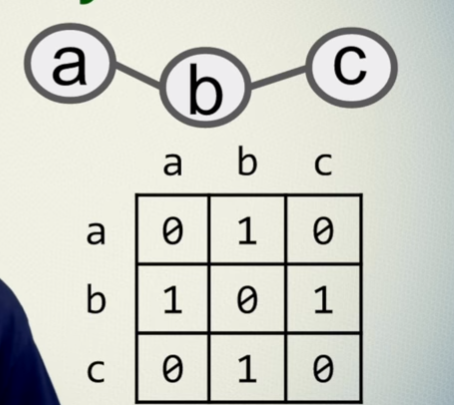


- **Incidence Matrix** = las filas son los nodos y las columnas los ejes o conexiones. Los valores de dentro marcan qué nodos participan de cada determinado eje.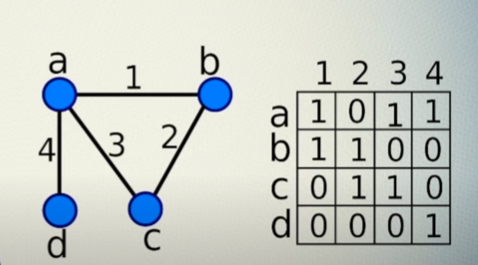

Por ejemplo, los nodos A y B están conectados por la conexión  Nº 1. Esto aparece representado por el hecho de que hay un 1 en las respectivas casillas.

### MÉTODOS QUE NO HE ENTENDIDO:

- Find all of the connected components with the **connected_components()** method.
- Use the **dijkstra** method to find the shortest path in a graph from one element to another.
- Use the **floyd_warshall()** method to find shortest path between all pairs of elements.
- The **bellman_ford()** method can also find the shortest path between all pairs of elements, but this method can handle negative weights as well.
- The **depth_first_order()** method returns a depth first traversal from a node.
- The **breadth_first_order()** method returns a breadth first traversal from a node.

Find all of the connected components with the connected_components() method.

In [1]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 0, 1],
  [0, 0, 2],
  [1, 2, 0]
])

newarr = csr_matrix(arr)

n_components, labels = connected_components(newarr)

In [2]:
n_components #The number of connected components.

1

In [3]:
labels #The length-N array of labels of the connected components.

array([0, 0, 0])

IndexError: invalid number of indices